In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('/Users/MacBookPro1/Desktop/SalesStats/DatafinitiElectronicsProductData.csv')

In [12]:
price_df = pd.read_json('https://raw.githubusercontent.com/BestBuyAPIs/open-data-set/master/products.json')

In [3]:
data_df.shape

(7299, 27)

In [4]:
data_df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [5]:
data_df = data_df.drop(columns=['id', 'asins','colors','dateAdded','dateUpdated','dimension', 'ean', 'imageURLs', 'keys','manufacturerNumber','reviews.date','reviews.sourceURLs','reviews.username', 'sourceURLs', 'upc', 'weight'])

In [6]:
data_df.columns

Index(['brand', 'categories', 'manufacturer', 'name', 'primaryCategories',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.text', 'reviews.title'],
      dtype='object')

In [28]:
data_df.head(5)

,brand,categories,manufacturer,name,primaryCategories,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,It's thin and light. I can type pretty easily ...,Nice
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,I love the new design the keys are spaced well...,New
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement


In [27]:
mask = data_df['reviews.rating'] == 5.0
brand_df = data_df.loc[mask]
#brand_df

In [20]:
data_duplrem = data_df.drop_duplicates('brand')
## data_duplrem['brand']

In [13]:
price_df.shape

(51646, 12)

In [14]:
price_df.columns

Index(['category', 'description', 'image', 'manufacturer', 'model', 'name',
       'price', 'shipping', 'sku', 'type', 'upc', 'url'],
      dtype='object')

In [15]:
price_df = price_df.drop(columns=['image','url','upc','sku','category'])

In [26]:
price_df.head(5)

,description,brand,model,name,price,shipping,type
0,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,Duracell - AAA Batteries (4-Pack),5.49,5.49,HardGood
1,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,Duracell - AA 1.5V CopperTop Batteries (4-Pack),5.49,5.49,HardGood
2,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,Duracell - AA Batteries (8-Pack),7.49,5.49,HardGood
3,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,Energizer - MAX Batteries AA (4-Pack),4.99,5.49,HardGood
4,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,Duracell - C Batteries (4-Pack),8.99,5.49,HardGood


In [17]:
price_df = price_df.rename(columns={'manufacturer': 'brand'})

In [18]:
price_df.columns

Index(['description', 'brand', 'model', 'name', 'price', 'shipping', 'type'], dtype='object')

In [22]:
price_duplrem = price_df.drop_duplicates('brand')
#price_duplrem = ('brand')

In [24]:
brands = ['Microsoft', 'iHome','JBL', 'Yamaha','Sony','Samsung', 'Logitech','Lenovo','Toshiba','Dell']
def get_brand_price_mean():
    average_price_brand=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(brands)):
        mask = price_df['brand'] == brands[i]
        brand_df = price_df.loc[mask].mean()
        average_price_brand[i]=brand_df
    return average_price_brand

print(get_brand_price_mean())

[price    196.404661
dtype: float64, price    41.954286
dtype: float64, price    158.163739
dtype: float64, price    469.744265
dtype: float64, price    471.256211
dtype: float64, price    831.13711
dtype: float64, price    80.367907
dtype: float64, price    510.032736
dtype: float64, price    346.865139
dtype: float64, price    521.521122
dtype: float64]


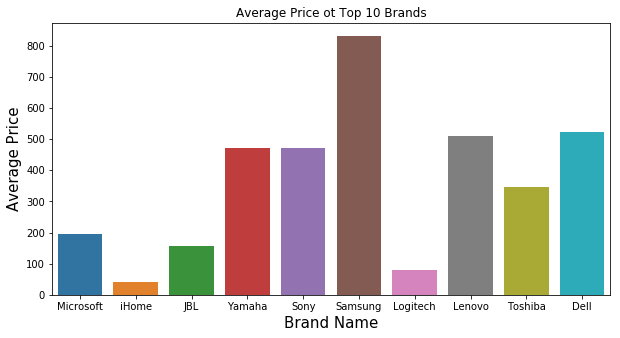

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(brands,get_brand_price_mean())
plt.title('Average Price of Top 10 Brands')
plt.ylabel('Average Price', fontsize=15)
plt.xlabel('Brand Name', fontsize=15)
plt.show()